In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d

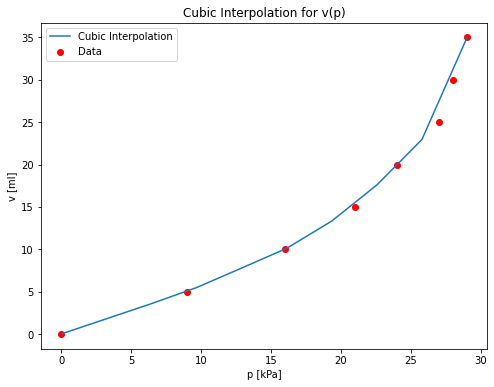

5.714285714285714


In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
# Fit PV curve

# Data from Shibo groupmeeting slides pneunet actuator with h = \inf 
v_fit = np.array([0, 5, 10, 15, 20, 25, 30, 35])*1e-6 #[m3] data in mL converted to L
p_fit = np.array([0, 9, 16, 21, 24, 27, 28, 29])*1000 #[pa] data in kpa converted to pa

# Create cubic spline
volume_act = interp1d(p_fit, v_fit, kind='slinear',bounds_error=False, fill_value="extrapolate") #L/Pa

# Plot
p_vals = np.linspace(p_fit[0], p_fit[-1], 10)
v_vals = volume_act(p_vals)

plt.figure(figsize=(8, 6))
plt.plot(p_vals/1000, v_vals*1e6, label='Cubic Interpolation')
plt.scatter(p_fit/1000, v_fit*1e6, color='red', label='Data')
plt.legend()
plt.xlabel('p [kPa]')
plt.ylabel('v [ml]')
plt.title('Cubic Interpolation for v(p)')
plt.show()

p = 10e3  # For example
v = volume_act(p)
print(v*1e6)

In [3]:
P_tank_0 = 1.6e5  # Initial pressure in first tank, Pa

#P_act_0 must be a fraction higher than P_amb otherwise )_act-P_amb =0 and the solver cannot devide by 0. 
P_act_0 = 1.001e5  # Initial pressure in second tank (ambient pressure), Pa
V_tank = 0.003  # Volume of first tank, m^3
V_act = 0.0003  # Volume of second tank, m^3
P_ambient = 1e5  # Ambient pressure, Pa
R_valve = 1/12  # Resistance of first valve, Pa.s/m^3
R_act = 1/12  # Resistance of second valve, Pa.s/m^3

# System of ODEs
def dPdt(P, t):
    P_tank, P_act = P

    #Volume flow out of tank is pressure difference devided by the resistance of the valve 
    Q_tank = (P_tank - P_act) / R_valve if P_tank > P_act else 0  # Flow rate from tank to actuator
    Q_act = (P_act - P_ambient) / R_act if P_act > P_ambient else 0  # Flow rate from second tank to environment
    print(Q_tank,Q_act)
    # Pressure drop is related to the volume out and the original volume 
    dP_tank_dt = -Q_tank / V_tank  # Change in pressure in tank

    #Volume of actuator is a function of the pressure 
    dP_act_dt = ((Q_tank - Q_act) / volume_act(P_act-P_ambient))  # Change in pressure in act
    print(dP_act_dt)
    #dP_act_dt = ((Q_tank - Q_act) / V_act)*P_act 
    return [dP_tank_dt, dP_act_dt]

# Time array for simulation
t = np.linspace(0, 100,100 )  # From 0 to 20 seconds, 1000 points in time

# Solve system of ODEs
P_tank, P_act = odeint(dPdt, [P_tank_0, P_act_0], t).T

# Calculate flow rates Q1 and Q2
Q_tank = np.maximum((P_tank - P_act) / R_valve, 0)
Q_act = np.maximum((P_act - P_ambient) / R_act, 0)

718800.0 1200.0
12916800000000.0
718653.3647648911 1346.6325151513447
11505607686038.287
718669.3847300161 1330.6125505812233
11644650031526.947
718667.8063104681 1332.1909700684482
11630801919154.674
718763.3411912225 1236.6581287878798
12532628050841.861
718764.4314786958 1235.5678413491696
12543725189256.363
718794.3827101882 1205.617185616109
12856417045357.396
718794.4089691899 1205.5909266150557
12856698012184.633
718788.8176940092 1211.1820976006566
12797148306259.793
718788.8435906523 1211.156200958183
12797422855412.97
718777.7642742625 1222.2353089610115
12681027386474.34
718777.7633371757 1222.2362460478325
12681017630826.992
718766.7844548856 1233.2149199540145
12567740505874.236
718766.7830945551 1233.2162802845123
12567726595056.443
718755.9013945358 1244.0977719230577
12457425218511.635
718755.9000944096 1244.0990720493137
12457412154928.979
718697.3880958972 1302.6099185072235
11895907584052.143
718697.3822544137 1302.615759990702
11895854044012.291
718641.3393527516 13

c:\Users\Olivi\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


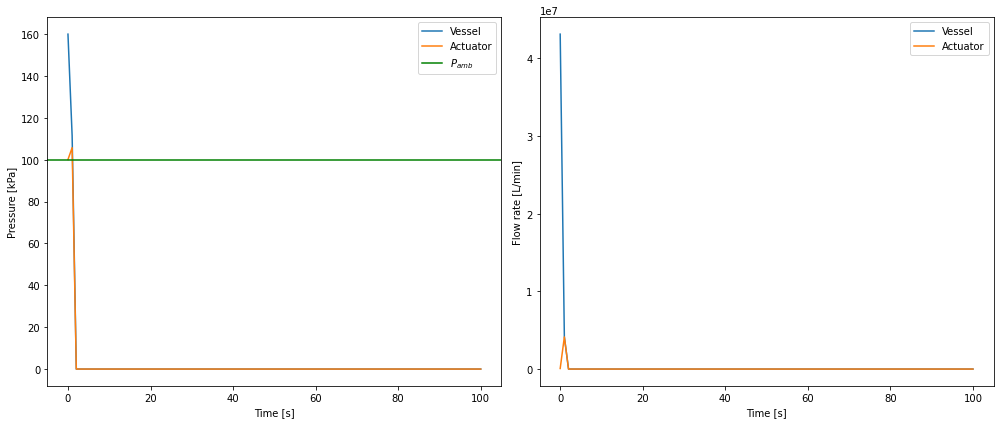

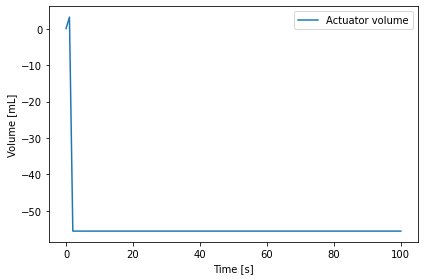

In [4]:
plt.figure(figsize=(14, 6))

plt.subplot(121)  # The first plot in a 1-row, 2-column configuration
plt.plot(t, P_tank / 1e3, label='Vessel')  # Pressure in first tank, bar
plt.plot(t, P_act / 1e3, label='Actuator')  # Pressure in second tank, bar
plt.axhline(P_ambient/1e3,label='$P_{amb}$',color='green')
plt.xlabel('Time [s]')
#plt.ylim(0, 2)
plt.ylabel('Pressure [kPa]')
plt.legend()

plt.subplot(122)  # The second plot in a 1-row, 2-column configuration
plt.plot(t, Q_tank*60 , label='Vessel')
plt.plot(t, Q_act*60 , label='Actuator')  # Flow rate from second tank, L/s
plt.xlabel('Time [s]')
plt.ylabel('Flow rate [L/min]')
#plt.ylim(0, 10)
plt.legend()

plt.tight_layout()
plt.show()

plt.plot(t, volume_act(P_act-P_ambient)*1e6, label='Actuator volume')  # Volume of actuator, converted to mL
plt.xlabel('Time [s]')
plt.ylabel('Volume [mL]')
#plt.ylim(0,0.5)
plt.legend()

plt.tight_layout()
plt.show()